# Exploring Titanic Data with Copilot
The Titanic is a famous ship that sank in 1912. The data set contains information about the passengers on the ship. The goal of this notebook is to explore the data set and find out what factors made people more likely to survive.

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Read the Titanic dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
q: What is the meaning of SibSp and Parch columns in the Titanic dataset?
a: SibSp: Number of Siblings/Spouses Aboard
   Parch: Number of Parents/Children Aboard

In [3]:
# Let's compute how many passengers survived and print the result
survived = df['Survived'].sum()
print(f'{survived} passengers survived')

# Let's compute how many passengers did not survive and print the result
not_survived = df['Survived'].count() - survived
print(f'{not_survived} passengers did not survive')


342 passengers survived
549 passengers did not survive


The correlation between Survived and Pclass is -0.3384810359610147


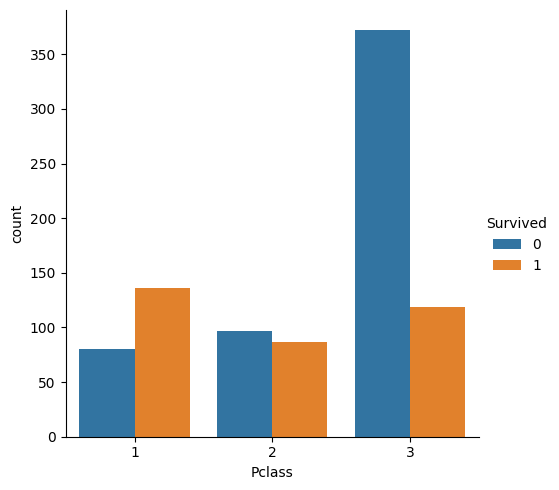

In [4]:
# Let's look at the correlation between the columns Survived and Pclass
correlation = df['Survived'].corr(df['Pclass'])
print(f'The correlation between Survived and Pclass is {correlation}')

# And visualize the number of passengers that survived or not in each class in a catplot
import seaborn as sns
sns.catplot(x='Pclass', hue='Survived', data=df, kind='count')


/tmp/ipykernel_9457/2484791048.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.clustermap(df.groupby(['Pclass', 'AgeGroup']).size().unstack(), cmap='viridis')


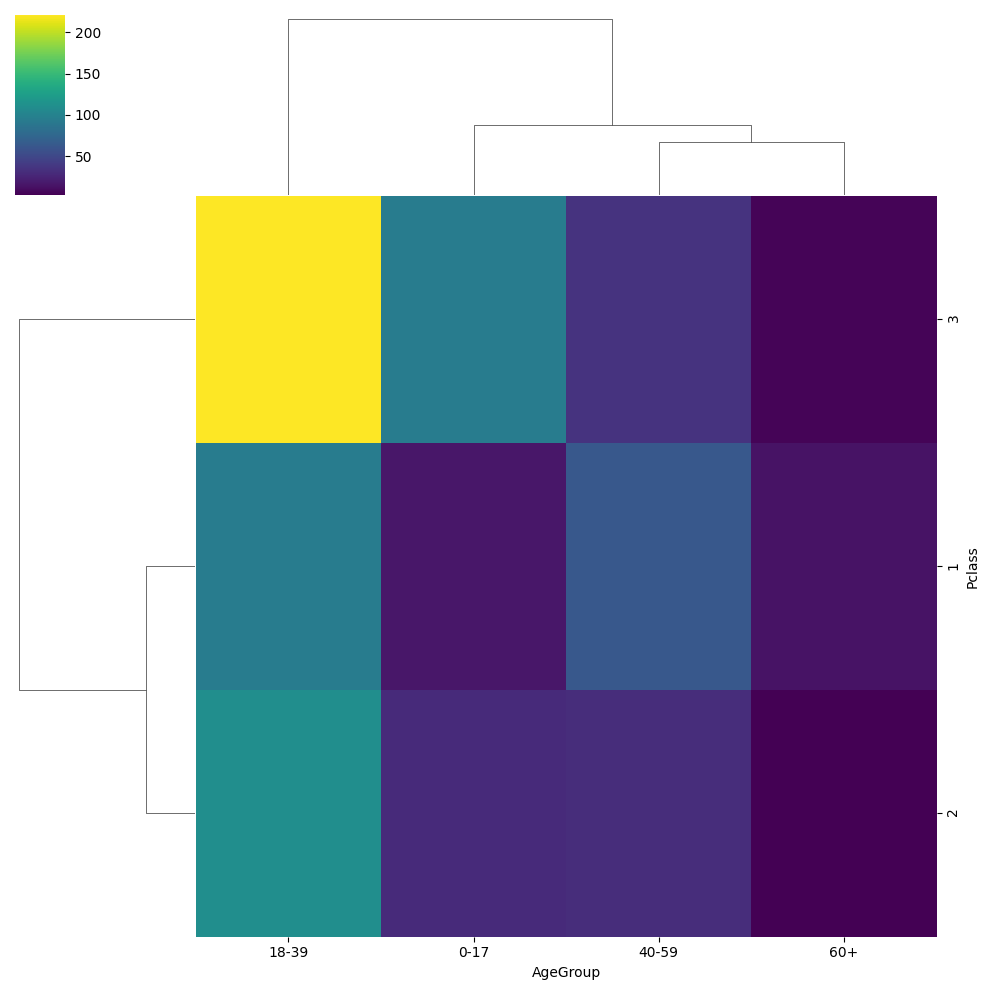

In [5]:
# Let's categorize the passengers by age group
bins = [0, 18, 40, 60, 100]
labels = ['0-17', '18-39', '40-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
# And visualize that categorization in a clustermap
sns.clustermap(df.groupby(['Pclass', 'AgeGroup']).size().unstack(), cmap='viridis')


<Axes: xlabel='FareGroup', ylabel='Survived'>

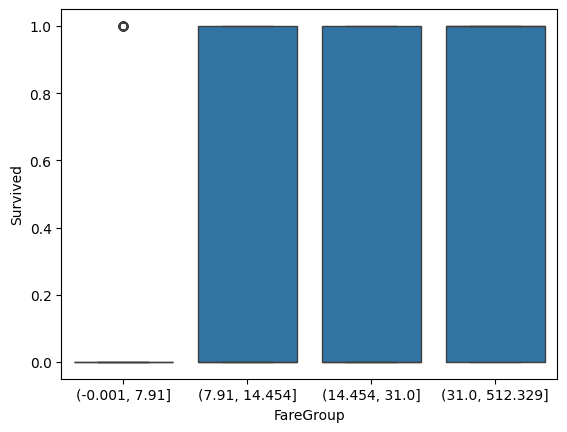

In [6]:
# Let's categorize the survived and dead passengers by fare group and visualize that in a boxplot
df['FareGroup'] = pd.qcut(df['Fare'], q=4)
sns.boxplot(x='FareGroup', y='Survived', data=df)
 

The correlation between Survived and Fare is 0.25730652238496227


<Axes: xlabel='Survived', ylabel='Fare'>

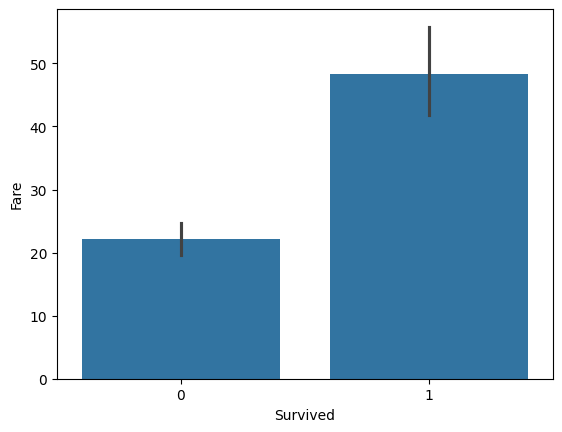

In [7]:
# Let's calculate the correlation between the columns Survived and Fare and visualize that in a barplot
correlation = df['Survived'].corr(df['Fare'])
print(f'The correlation between Survived and Fare is {correlation}')
sns.barplot(x='Survived', y='Fare', data=df)


In [8]:
# Let's calculate the number of survived passengers that has a sibling or spouse aboard
siblings_spouses = df[df['SibSp'] > 0]['Survived'].sum()
print(f'{siblings_spouses} passengers that have a sibling or spouse aboard survived')


132 passengers that have a sibling or spouse aboard survived


In [9]:
# Let's calculate the probability of surviving for passengers that have a parent or child aboard
parent_child = df[df['Parch'] > 0]
probability = parent_child['Survived'].sum() / parent_child['Survived'].count()
print(f'The probability of surviving for passengers that have a parent or child aboard is {probability}')


The probability of surviving for passengers that have a parent or child aboard is 0.5117370892018779


<Axes: xlabel='Family', ylabel='Survived'>

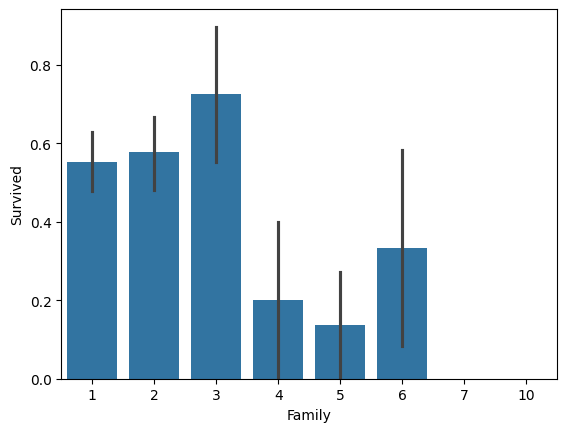

In [10]:
# Let's visualize the probability of surviving for passengers that have a parent or child and a sibling or brother aboard in a barplot
df['Family'] = df['SibSp'] + df['Parch']
family = df[df['Family'] > 0]
sns.barplot(x='Family', y='Survived', data=family)
